In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import bitstring
import matplotlib as mpl

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

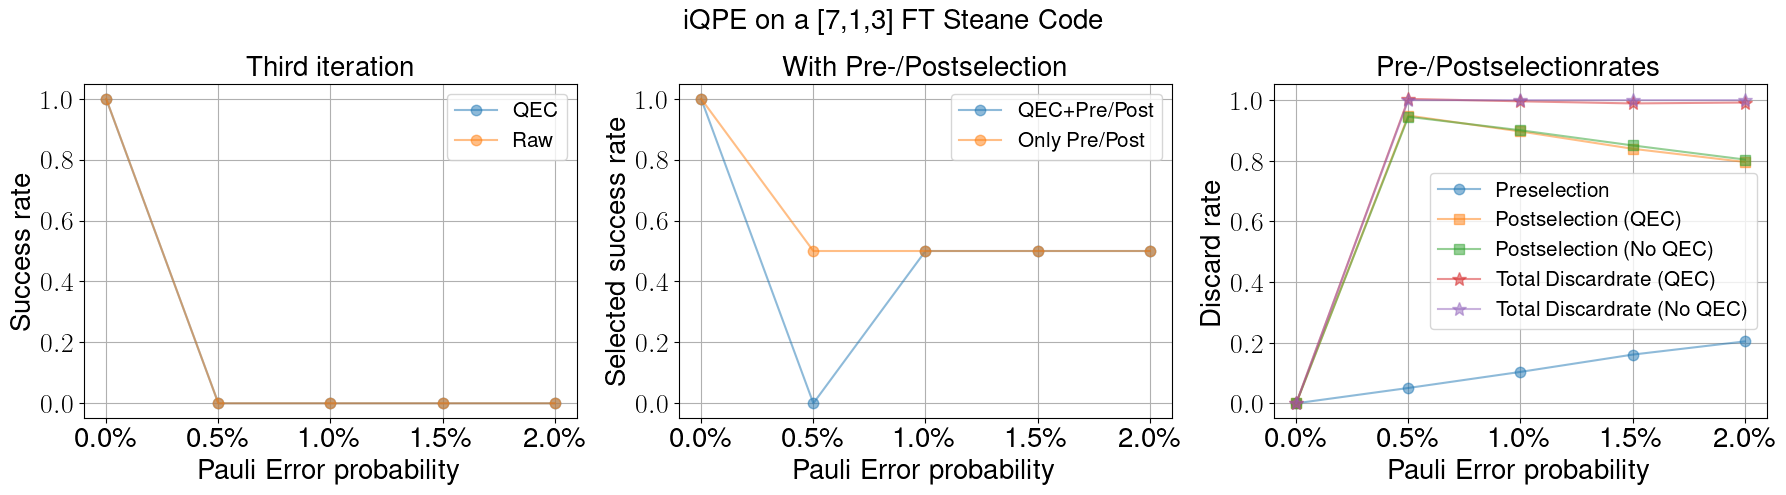

In [7]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_a.txt", delimiter = ",")       #noisy qec after every T/Tdagger

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))


ax1.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("Third iteration", fontsize=20)
ax2.set_title("With Pre-/Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Pre-/Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [7,1,3] FT Steane Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/HPC22.png", dpi = 200)
plt.show()